<a href="https://colab.research.google.com/github/ucfilho/Disciplina_Metodos_Numericos_2020/blob/master/Mod_03_class_18_ode_reactor_nov_03_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The elementary gas phase reaction 2A $\rightleftharpoons$ C is carried out in a packed bed reactor.



There is a heat exchanger surrounding the reactor, 
and there is a pressure drop along the length of the reactor.


$F_{A0}\frac{dX}{dW}=-R_A$

$\frac{dy}{dW}=\frac{-\alpha (1-0.5X)}{2y}\frac{T}{T_0}$

$\frac{dT}{dW}=\frac{U_a(T_a-T) +R_A\Delta H_R}{F_{A0}C_{PA}}$

$y=\frac{P}{P_0}$

$C_C=\left( \frac{0.5C_{A0}X}{1-0.5X} \right)y\frac{T}{T_0}$

$C_A =C_{A0}\left(\frac{1-X}{1-0.5X}\right)y\frac{T_0}{T} $



In [2]:
!git clone https://github.com/ucfilho/Disciplina_Metodos_Numericos_2020 #clonar do Github
%cd Disciplina_Metodos_Numericos_2020

fatal: destination path 'Disciplina_Metodos_Numericos_2020' already exists and is not an empty directory.
/content/Disciplina_Metodos_Numericos_2020


In [3]:
from edo_rk4 import rk4

In [4]:
X0 = 0
T0 = 450.0
y0 =1.0
CPA=40.0
CPC=80.0
deltaHR=-40e3
Ea= 41.8e3
k450=0.5
KC450=25e3
CA0=0.271
R=8.314
FA0=5.0
Ua = 0.8
Ta=500
alpha = 0.015
P0=10
yA0=1.0

def model(Resp, t):

  X, y, T  = Resp[0], Resp[1], Resp[2]
  CC = (0.5*CA0*X)/(1.0-0.5*X)*y*T0/T
  CA = CA0*(1.0-X)/ (1-0.5*X)*y* T0/T
  k = k450*np.exp(Ea/R*(1/450-1/T))
  KC = KC450*np.exp(deltaHR/R*(1/450-1/T))
  RA = -k* (CA**2-CC/KC)
  
  dX  = -1.0/FA0 * RA
  dy =  -alpha*(1-0.5*X)/(2*y)*T/T0
  dT =  (Ua*(Ta-T)+RA*deltaHR) / (FA0*CPA) 
  
  return [dX, dy, dT]



In [5]:
# initial state
Resp0 = [X0, y0, T0]  # [ X,  y,  T]
# time coodinate to solve the ODE for: from 0 to 10 seconds
W = np.linspace(0, 40, 40)
dW=W[1]-W[0]

In [6]:
# compute various numerical solutions
x = rk4( model, Resp0, W )


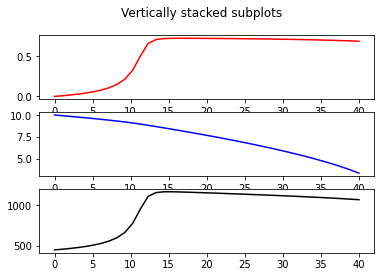

In [7]:
# plot the angles as a function of time
fig, axs = plt.subplots(3)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(W, x[:, 0], 'r', label="Conversao")
axs[1].plot(W, P0*x[:, 1], 'b', label="Pressao")
axs[2].plot(W, x[:, 2], 'k', label="Temperatura")


In [8]:
x[:,2]

array([ 450.        ,  458.27049567,  467.80335092,  478.98854921,
        492.40609885,  508.96031757,  530.14548733,  558.61429306,
        599.49965922,  663.64570101,  773.87995977,  951.38113484,
       1106.88809879, 1152.55774728, 1162.37519003, 1162.90128121,
       1160.73466668, 1157.78641943, 1154.59628643, 1151.31029578,
       1147.9650809 , 1144.56733451, 1141.11537023, 1137.60484894,
       1134.03024824, 1130.38518738, 1126.66243378, 1122.85380938,
       1118.95005291, 1114.94065169, 1110.81364454, 1106.55539635,
       1102.15034624, 1097.5807383 , 1092.82635687, 1087.86431569,
       1082.66900486, 1077.21241277, 1071.46528384, 1065.40013216])